**Говорова Диана, 23.М08-мм**

**Задание 1: **
- Самостоятельно скачать данные (из открытых источников по интересующей тематике, на сайте kaggle, UCI репозитория, Google Dataset Search и др.). Для полного балла нужно выбрать данные, в которых есть пропущенные значения.    (СДЕЛАНО)
- Считать данные и вывести их основные характеристики, описание признаков.       (СДЕЛАНО)
- Сформулировать задачу предсказания, какой признак интересно было бы предсказывать по остальным.     (СДЕЛАНО)   
- (+2 балла) Произвести чистку данных (Data Cleaning). Например, заполнить пропущенные значения чем то осмысленным для поставленной задачи.    (СДЕЛАНО)  
- Провести анализ признаков, используя визуализацию (hist(), boxplot(), countplot(), barplot() и тд), сделать выводы, которые могут быть полезны при дальнейшем решении задачи предсказания.       (СДЕЛАНО)
- (+1 балл) Оценить зависимость между признаками (визуализация или построение матрицы корреляции).   (СДЕЛАНО)   
- (+2 балла) Выполнить полезные преобразования данных (например, трансформировать категариальные признаки в количественные если это нужно), убрать ненужные признаки, создать новые (Feature Engineering).     (СДЕЛАНО)  

In [1]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter("ignore")

%matplotlib inline

**DataFrame Covid-19:**
**1-да, 2-нет**

- USMER - тип мед.учреждения(1 или 2)
- SEX - пол, 1 for female and 2 for male.
- PATIENT_TYPE - тип помощи(2 - остался в стационаре или 1 - отправился домой)
- DATE_DIED - дата смерти, если пациент умер, иначе 9999-99-99 (можно рассматривать как nan)
- INTUBATION - был ли пациент подключен к аппарату ИВЛ
- PNEUMONIA - было ли у пациента воспаление легких
- AGE - возраст
- DIABETES - болел ли пациент диабетом
- OTHER_DISEASE - были ли у пациента другие хронические заболевания
- CARDIOVASCULAR - были ли у пациента заболевания СС системы
- OBESITY - страдал ли пациент ожирением
- TOBACCO - курил ли пациент
- ICU - был ли пациент помещен в отделение интенсивной терапии

In [3]:
data = pd.read_csv(r"C:\Users\diana\ML MAG 1 SEM\Task 1/Covid Data_1.csv", sep = ';')
data

,USMER,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,DIABETES,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,TOBACCO,ICU
0,2,2,2,09.06.2020,1.0,2,55,1.0,2.0,2.0,2.0,2.0,2.0
1,2,2,2,9999-99-99,1.0,1,45,2.0,2.0,2.0,2.0,2.0,1.0
2,2,1,2,9999-99-99,1.0,1,58,2.0,2.0,1.0,1.0,2.0,1.0
3,2,1,2,9999-99-99,1.0,1,48,1.0,2.0,2.0,2.0,2.0,1.0
4,2,2,2,9999-99-99,1.0,1,27,2.0,2.0,2.0,2.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2352,2,1,1,9999-99-99,NaN,1,80,2.0,2.0,2.0,2.0,2.0,NaN
2353,2,1,1,9999-99-99,NaN,2,20,2.0,2.0,2.0,2.0,2.0,NaN
2354,2,2,1,9999-99-99,NaN,2,59,2.0,2.0,2.0,2.0,2.0,NaN
2355,2,1,1,9999-99-99,NaN,2,27,2.0,2.0,2.0,2.0,2.0,NaN


In [4]:
#Заменим значения пола и типа лечения на строковый тип для удобства представления графиков и во избежании путаницы. 
#При реализации предсказания заменим обратно.
data['SEX'].replace (1, 'female', inplace = True)
data['SEX'].replace (2, 'male', inplace = True)

data['PATIENT_TYPE'].replace (2, 'clinic', inplace = True)
data['PATIENT_TYPE'].replace (1, 'home', inplace = True)

In [4]:
#Посмотрим количество нулевых значений в каждом столбце
data.isnull().sum()

USMER              0
SEX                0
PATIENT_TYPE       0
DATE_DIED          0
INTUBED           98
PNEUMONIA          0
AGE                0
DIABETES          12
OTHER_DISEASE     19
CARDIOVASCULAR    13
OBESITY            8
TOBACCO           14
ICU               98
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2357 entries, 0 to 2356
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   USMER           2357 non-null   int64  
 1   SEX             2357 non-null   object 
 2   PATIENT_TYPE    2357 non-null   object 
 3   DATE_DIED       2357 non-null   object 
 4   INTUBED         2259 non-null   float64
 5   PNEUMONIA       2357 non-null   int64  
 6   AGE             2357 non-null   int64  
 7   DIABETES        2345 non-null   float64
 8   OTHER_DISEASE   2338 non-null   float64
 9   CARDIOVASCULAR  2344 non-null   float64
 10  OBESITY         2349 non-null   float64
 11  TOBACCO         2343 non-null   float64
 12  ICU             2259 non-null   float64
dtypes: float64(7), int64(3), object(3)
memory usage: 239.5+ KB


In [6]:
data.describe()

,USMER,INTUBED,PNEUMONIA,AGE,DIABETES,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,TOBACCO,ICU
count,2357.000000,2259.000000,2357.000000,2357.000000,2345.000000,2338.000000,2344.000000,2349.000000,2343.000000,2259.000000
mean,1.332202,1.732182,1.226135,54.926602,1.685714,1.963216,1.949232,1.803321,1.928724,1.860115
std,0.471103,0.442920,0.418416,18.081619,0.464330,0.188270,0.219570,0.397573,0.257340,0.346944
min,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000,44.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000
50%,1.000000,2.000000,1.000000,56.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
75%,2.000000,2.000000,1.000000,67.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,2.000000,2.000000,2.000000,103.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


В описании нас интересует только столбец с возрастом, видим, что средний возраст 55 лет, min - 0, а max - 103.

In [7]:
#Произведем Data Cleaning.
#Создадим новый столбец с информацией умер человек или нет, основываясь на столбце с датой смерти(где 9999-99-99 is nan) 
#После чего удалим столбец с датой смерти, так как для дальнейшего анализа он не потребуется. 
data['DEATH'] = data['DATE_DIED'].apply(lambda x: 0 if x == '9999-99-99' else 1)
data.drop(columns = ['DATE_DIED'], inplace = True)

In [8]:
#Посмотрим сколько каких значений в каждом столбце
for i in data.columns:
    if(i!='AGE' and i!='DATE_DIED'):
        print(i," -- ", dict(data[i].value_counts()))

USMER  --  {1: 1574, 2: 783}
SEX  --  {'male': 1420, 'female': 937}
PATIENT_TYPE  --  {'clinic': 2259, 'home': 98}
INTUBED  --  {2.0: 1654, 1.0: 605}
PNEUMONIA  --  {1: 1824, 2: 533}
DIABETES  --  {2.0: 1608, 1.0: 737}
OTHER_DISEASE  --  {2.0: 2252, 1.0: 86}
CARDIOVASCULAR  --  {2.0: 2225, 1.0: 119}
OBESITY  --  {2.0: 1887, 1.0: 462}
TOBACCO  --  {2.0: 2176, 1.0: 167}
ICU  --  {2.0: 1943, 1.0: 316}
DEATH  --  {1: 1280, 0: 1077}


**B качестве предсказываемого признака интересно было бы взять факт смерти пациента от Covid19. В качестве параметров можно
взять наличия одного/нескольких хронических заболеваний, также возраст пациента, его пол, а также помещение пациента на аппарат ИВЛ.**

In [9]:
#Количество умерших
print(data['DEATH'].value_counts())
print('')
print("Доля умерших от ковида: ", round(data['DEATH'].mean(), 3))

1    1280
0    1077
Name: DEATH, dtype: int64

Доля умерших от ковида:  0.543


In [10]:
#Количество умерших каждого пола
data.groupby(['SEX', 'DEATH'])['DEATH'].count()


SEX     DEATH
female  0        482
        1        455
male    0        595
        1        825
Name: DEATH, dtype: int64

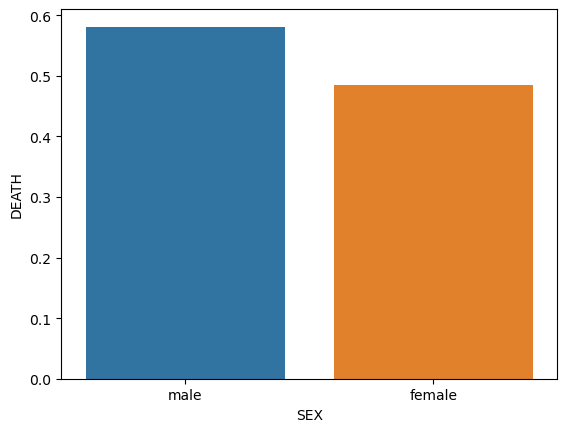

In [11]:
sns.barplot(x = "SEX", y = "DEATH", data = data,  ci = None);

На графике выше видно, что процент смертности от ковида у мужчин выше.

........................................................................................................................................

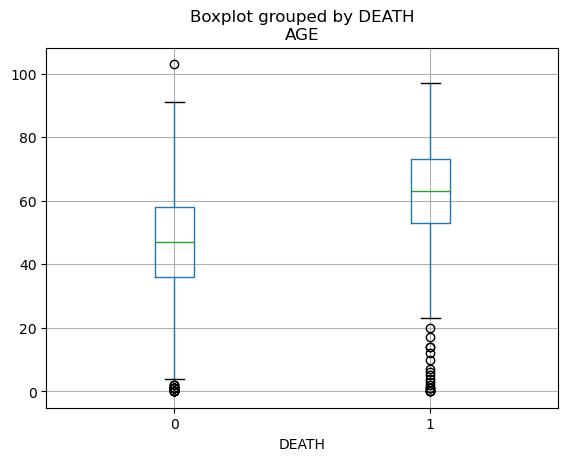

In [12]:
#Теперь посмотрим как смертность распределялась по возрастам
data.boxplot(column="AGE", by="DEATH")
plt.show()

Средний возраст умерших ~62 года, средний возраст выживших ~48 лет, что говорит о том, 
что возраст в принципе может стать хорошим параметром для предсказания смертности. Также на графике видно, 
что смерти пациентов до ~20 лет являются скорее выбросами.

........................................................................................................................


Интересно посмотреть зависимость между подключением к аппарату ИВЛ и смертью. Так как есть мнение, что после аппарата человек уже вряд ли выкарабкается.

In [13]:
data.groupby(["INTUBED", "DEATH"])['DEATH'].count()

INTUBED  DEATH
1.0      0         71
         1        534
2.0      0        912
         1        742
Name: DEATH, dtype: int64

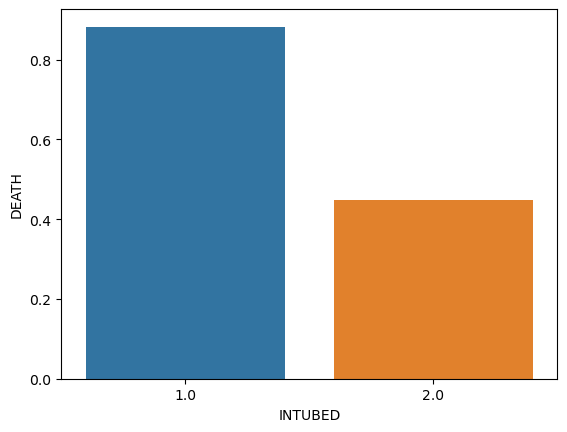

In [14]:
sns.barplot(x = "INTUBED", y = "DEATH", data = data, ci = None);

На графике четко видно, что при подключению пациента к аппарату ИВЛ смертность превышает 85%, в то время как смертность 
не интубированных пациентов не превышает и 50%

.........................................................................................................................

Можно посмотреть зависимость смерти пациента от того факта, была ли у него пневмония

In [15]:
data.groupby(['PNEUMONIA', 'DEATH'])['DEATH'].count()

PNEUMONIA  DEATH
1          0         674
           1        1150
2          0         403
           1         130
Name: DEATH, dtype: int64

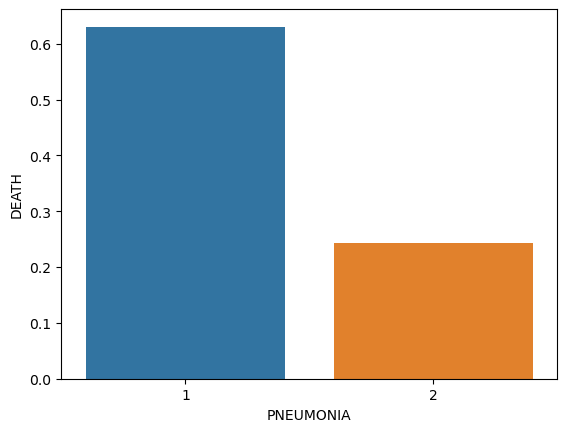

In [16]:
sns.barplot(x = 'PNEUMONIA', y = 'DEATH', data = data, ci = None);

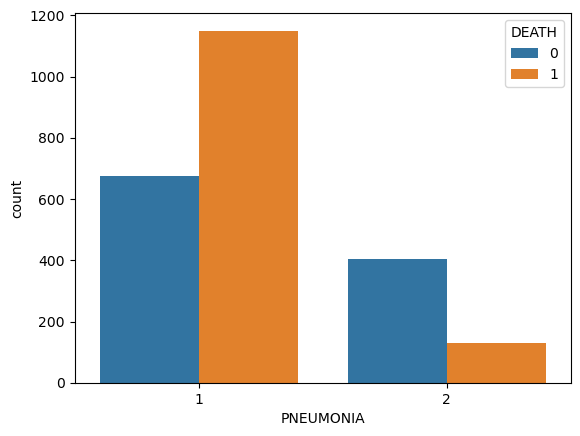

In [17]:
sns.countplot('PNEUMONIA', hue='DEATH', data=data);

Исходя из графиков видно, что зависимисть смерти от наличия пневмонии тоже достаточно хорошо прослеживается.

.............................................................................................................................................

Посмотрим зависимость типа мед учреждения, оказанной помощи и смертнотью

In [18]:
pd.crosstab([data['USMER']], [data['DEATH']], margins=True).style.background_gradient()

DEATH,0,1,All
USMER,,,
1,686,888,1574
2,391,392,783
All,1077,1280,2357


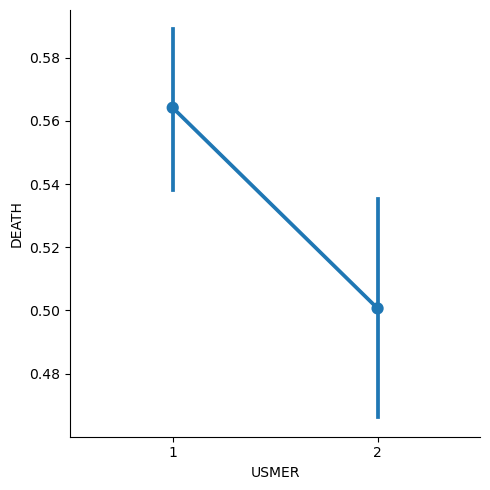

In [19]:
sns.factorplot('USMER', 'DEATH', data=data);

При разбиении по номеру больницы доля смертности оказалась ~ равна : 50-56%, поэтому для дальнейшего анализа и построения модели классификации этот признак можем убрать.

In [20]:
data.drop(columns = ['USMER'], inplace = True)

..........................................................................................................................

Теперь займемся преобразованием данных

Разобьем возраст пациентов на 6 классов

In [21]:
data['Age_class'] = 0 
data.loc[data['AGE'] <= 18, 'Age_class'] = 0  
data.loc[(data['AGE'] > 18) & (data['AGE'] <= 35), 'Age_class'] = 1
data.loc[(data['AGE'] > 35) & (data['AGE'] <= 48), 'Age_class'] = 2
data.loc[(data['AGE'] > 48) & (data['AGE'] <= 60), 'Age_class'] = 3
data.loc[(data['AGE'] > 60)  & (data['AGE'] <= 75), 'Age_class'] = 4
data.loc[data['AGE'] > 75, 'Age_class'] = 5


In [22]:
data.drop(columns = ['AGE'], inplace = True)

In [23]:
data['Age_class'].value_counts()

4    642
3    631
2    475
5    303
1    219
0     87
Name: Age_class, dtype: int64

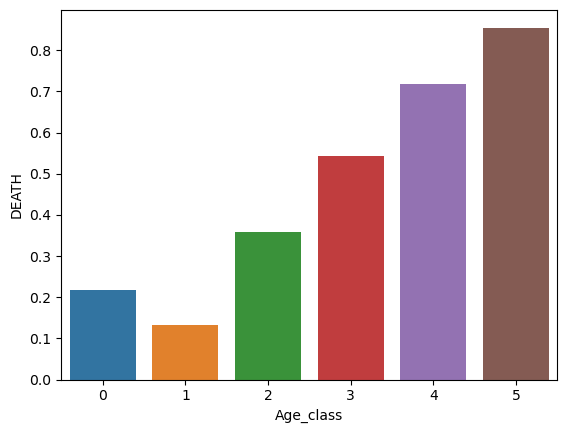

In [24]:
sns.barplot(x = 'Age_class', y = 'DEATH', data = data, ci = None);

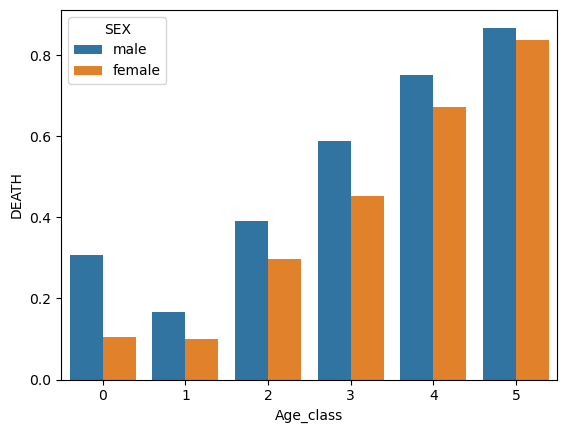

In [25]:
sns.barplot(x = 'Age_class', y = 'DEATH', hue = 'SEX', data = data, ci = None);

Видим, что доля смертности возрастает с увеличением возраста пациента,
при этом у пожилых пациентов смертность мужчин и женщин примерно равна,
у несовершеннолетних доля смертности мужчин сильно превосходит женщин, у остальных групп доля 
смертности мужчин также превосходит долю смертности женщин, но не так сильно, как у детей и подростков.

In [26]:
#Построим матрицу корреляции и визуализируем ее для лучшего восприятия информации
corr = data.corr()
corr

,INTUBED,PNEUMONIA,DIABETES,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,TOBACCO,ICU,DEATH,Age_class
INTUBED,1.000000,0.254542,0.046122,0.048484,0.062508,0.124017,0.004662,0.413188,-0.387675,-0.111414
PNEUMONIA,0.254542,1.000000,0.131439,0.040506,0.069445,0.113782,0.039020,0.166118,-0.324640,-0.229870
DIABETES,0.046122,0.131439,1.000000,0.015484,0.130735,0.157696,-0.024063,0.016023,-0.179274,-0.279694
OTHER_DISEASE,0.048484,0.040506,0.015484,1.000000,0.167948,0.089473,0.019980,-0.003908,-0.061418,-0.050512
CARDIOVASCULAR,0.062508,0.069445,0.130735,0.167948,1.000000,0.101695,0.079441,-0.018845,-0.076155,-0.113261
OBESITY,0.124017,0.113782,0.157696,0.089473,0.101695,1.000000,0.072600,0.020819,-0.069299,-0.089444
TOBACCO,0.004662,0.039020,-0.024063,0.019980,0.079441,0.072600,1.000000,0.041305,0.008155,-0.040179
ICU,0.413188,0.166118,0.016023,-0.003908,-0.018845,0.020819,0.041305,1.000000,-0.173773,-0.063163
DEATH,-0.387675,-0.324640,-0.179274,-0.061418,-0.076155,-0.069299,0.008155,-0.173773,1.000000,0.428223
Age_class,-0.111414,-0.229870,-0.279694,-0.050512,-0.113261,-0.089444,-0.040179,-0.063163,0.428223,1.000000


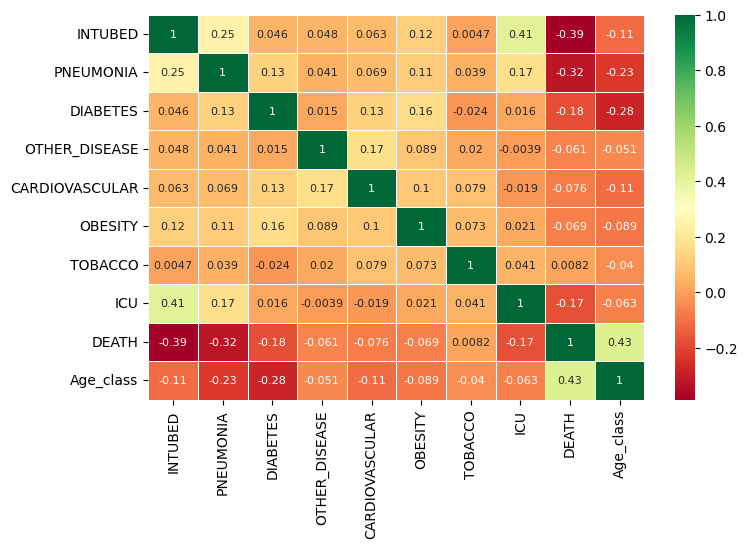

In [27]:
sns.heatmap(data.corr(), annot=True, cmap='RdYlGn', linewidths=0.5, annot_kws={'size':8})
fig = plt.gcf()
fig.set_size_inches(8, 5)
plt.show()

Сильнее всего прослеживается корреляция между:
- Подключением к аппарату ИВЛ и смертностью
- Пневмонией и смертностью
- Подключением к аппарату ИВЛ и был ли пациент помещен в отделение интенсивной терапии 
(мне кажется это взаимозаменяемые признаки и один из них можно убрать)
- Возраст и смертность
- Диабет и возраст (основываясь на научной информации эти параметры действительно коррелируют, 
но к нашей задаче это корреляция не относится)